In [ ]:
# Set up library for data extraction 
import requests                      # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs  # Beautifulsoup is for web scrapping...used to scrap specific content 
import re                            # regular expressions


In [ ]:
# Importing libraries for visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Importing NLTK library 
import nltk
from nltk.corpus import stopwords

In [ ]:
# Creating empty reviews list 
JwMarriot_reviews =[]

In [ ]:
# Extracting reviews 
for i in range(0,3000,5):
  ip=[]  
  
  url = "https://www.tripadvisor.in/Hotel_Review-g304554-d299754-Reviews-or" +str(i)+"-JW_Marriott_Mumbai_Juhu-Mumbai_Maharashtra.html#REVIEWS"
  response = requests.get(url)
  soup = bs(response.content,"html.parser") # creating soup object to iterate over the extracted content 
  for r in soup.findAll("q"):
    JwMarriot_reviews.append(r.span.text.strip())
    
JwMarriot_reviews

In [ ]:
# Total counting of extracting reviews 
len(JwMarriot_reviews)

In [ ]:
# Storing reviews in dataframe 
import pandas as pd 
df=pd.DataFrame()
df["JwMarriot_reviews"]=JwMarriot_reviews
type(JwMarriot_reviews)

In [ ]:
# Printing dataframed reviews 
df

In [ ]:
# Creating csv of extracted reviews 
df.to_csv(r'JwMarriot_hotel_data.csv', index=True)

In [ ]:
# Import JwMarriot_hotel_data.csv
import pandas as pd
df = pd.read_csv("JwMarriot_hotel_data.csv")

In [ ]:
# JwMarriot_hotel_data review  details 
df

Unnamed: 0                                  JwMarriot_reviews
0              0  The best stay with amazing facilities and serv...
1              1  We had booked the night stay to celebrate birt...
2              2  JW Marriott or Marriott is always the best cho...
3              3  Its expensive but they take good care of you. ...
4              4  For a short stay, JWM Juhu offered a great cit...
...          ...                                                ...
2995        2995  My wife & daughter had a 3 night stay, great l...
2996        2996  I am currently staying at the Marriott and wil...
2997        2997  We stayed for five nights and found this hotel...
2998        2998  Experienced one of the finest venues to organi...
2999        2999  My second business stay in this hotel. Newly r...

[3000 rows x 2 columns]

In [ ]:
# Delete the 'Unnamed: 0' column 
del df['Unnamed: 0']
df

JwMarriot_reviews
0     The best stay with amazing facilities and serv...
1     We had booked the night stay to celebrate birt...
2     JW Marriott or Marriott is always the best cho...
3     Its expensive but they take good care of you. ...
4     For a short stay, JWM Juhu offered a great cit...
...                                                 ...
2995  My wife & daughter had a 3 night stay, great l...
2996  I am currently staying at the Marriott and wil...
2997  We stayed for five nights and found this hotel...
2998  Experienced one of the finest venues to organi...
2999  My second business stay in this hotel. Newly r...

[3000 rows x 1 columns]

In [ ]:
# Importing libraries for visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Importing NLTK library 
import nltk
from nltk.corpus import stopwords

In [ ]:
# Cheking null values 
df.isnull().sum()

JwMarriot_reviews    0
dtype: int64

In [ ]:
# Cheking the review datframe details 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   JwMarriot_reviews  3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


In [ ]:
# Extract Number of words from each review  
df['word_count'] = df['JwMarriot_reviews'].apply(lambda x: len(str(x).split(" ")))
df[['JwMarriot_reviews','word_count']]

JwMarriot_reviews  word_count
0     The best stay with amazing facilities and serv...          40
1     We had booked the night stay to celebrate birt...         130
2     JW Marriott or Marriott is always the best cho...          61
3     Its expensive but they take good care of you. ...          39
4     For a short stay, JWM Juhu offered a great cit...          35
...                                                 ...         ...
2995  My wife & daughter had a 3 night stay, great l...          83
2996  I am currently staying at the Marriott and wil...         160
2997  We stayed for five nights and found this hotel...          72
2998  Experienced one of the finest venues to organi...          85
2999  My second business stay in this hotel. Newly r...          90

[3000 rows x 2 columns]

Text(0, 0.5, 'number of words range')

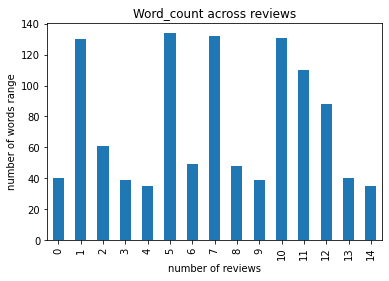

In [ ]:
# Bar plot for word_count across reviews 
df[0:15]['word_count'].plot.bar()
# Add labels 
plt.title('Word_count across reviews')
plt.xlabel('number of reviews')
plt.ylabel('number of words range')

In [ ]:
# Extract Number of characters from each review  
df['char_count'] = df['JwMarriot_reviews'].str.len() ## this also includes spaces
df[['JwMarriot_reviews','char_count']]

JwMarriot_reviews  char_count
0     The best stay with amazing facilities and serv...         225
1     We had booked the night stay to celebrate birt...         722
2     JW Marriott or Marriott is always the best cho...         339
3     Its expensive but they take good care of you. ...         220
4     For a short stay, JWM Juhu offered a great cit...         215
...                                                 ...         ...
2995  My wife & daughter had a 3 night stay, great l...         454
2996  I am currently staying at the Marriott and wil...         783
2997  We stayed for five nights and found this hotel...         381
2998  Experienced one of the finest venues to organi...         573
2999  My second business stay in this hotel. Newly r...         515

[3000 rows x 2 columns]

Text(0, 0.5, 'number of characters range')

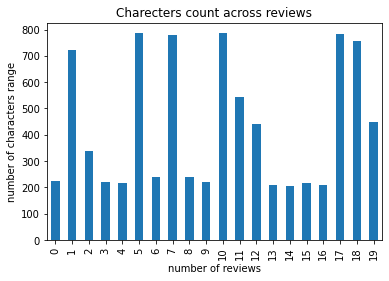

In [ ]:
# Bar plot for characters count across reviews 
df[0:20]['char_count'].plot.bar()
# Add labels 
plt.title('Charecters count across reviews')
plt.xlabel('number of reviews')
plt.ylabel('number of characters range')

In [ ]:
# Extract Number of average words from each review  
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['JwMarriot_reviews'].apply(lambda x: avg_word(x))
df[['JwMarriot_reviews','avg_word']]

JwMarriot_reviews  avg_word
0     The best stay with amazing facilities and serv...  4.650000
1     We had booked the night stay to celebrate birt...  4.706349
2     JW Marriott or Marriott is always the best cho...  4.573770
3     Its expensive but they take good care of you. ...  4.666667
4     For a short stay, JWM Juhu offered a great cit...  5.171429
...                                                 ...       ...
2995  My wife & daughter had a 3 night stay, great l...  4.481928
2996  I am currently staying at the Marriott and wil...  3.900000
2997  We stayed for five nights and found this hotel...  4.428571
2998  Experienced one of the finest venues to organi...  5.821429
2999  My second business stay in this hotel. Newly r...  4.840909

[3000 rows x 2 columns]

Text(0, 0.5, 'number of average words range')

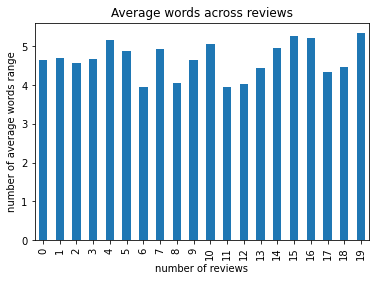

In [ ]:
# Bar plot for average words across reviews 
df[0:20]['avg_word'].plot.bar()
# Add labels 
plt.title('Average words across reviews')
plt.xlabel('number of reviews')
plt.ylabel('number of average words range')

In [ ]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Extract Number of stop words from each review  
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['JwMarriot_reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['JwMarriot_reviews','stopwords']]

JwMarriot_reviews  stopwords
0     The best stay with amazing facilities and serv...         15
1     We had booked the night stay to celebrate birt...         43
2     JW Marriott or Marriott is always the best cho...         26
3     Its expensive but they take good care of you. ...         14
4     For a short stay, JWM Juhu offered a great cit...         11
...                                                 ...        ...
2995  My wife & daughter had a 3 night stay, great l...         28
2996  I am currently staying at the Marriott and wil...         64
2997  We stayed for five nights and found this hotel...         30
2998  Experienced one of the finest venues to organi...         15
2999  My second business stay in this hotel. Newly r...         36

[3000 rows x 2 columns]

Text(0, 0.5, 'number of average words range')

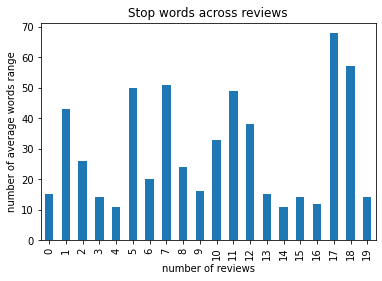

In [ ]:
# Bar plot for stop words across reviews 
df[0:20]['stopwords'].plot.bar()
# Add labels 
plt.title('Stop words across reviews')
plt.xlabel('number of reviews')
plt.ylabel('number of average words range')

In [ ]:
# Number of special characters from each review 
df['hastags'] = df['JwMarriot_reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['JwMarriot_reviews','hastags']].head(10)

JwMarriot_reviews  hastags
0  The best stay with amazing facilities and serv...        0
1  We had booked the night stay to celebrate birt...        0
2  JW Marriott or Marriott is always the best cho...        0
3  Its expensive but they take good care of you. ...        0
4  For a short stay, JWM Juhu offered a great cit...        0
5  Having locked at home for 8 months, it was tim...        0
6  The worst service ever for a 5 star hotel they...        0
7  Being 9 months pregnant, safety and comfort wa...        0
8  It was an excellent experience that we had at ...        0
9  It was a fabulous stay of 8 days with top notc...        0

Text(0, 0.5, 'number of hastags range')

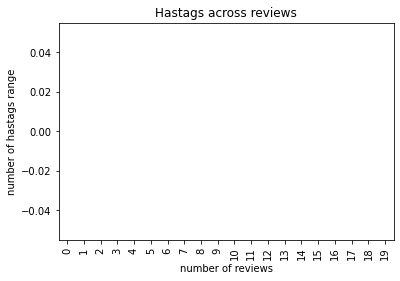

In [ ]:
# Bar plot for hastags across reviews 
df[0:20]['hastags'].plot.bar()
# Add labels 
plt.title('Hastags across reviews')
plt.xlabel('number of reviews')
plt.ylabel('number of hastags range')

In [ ]:
# Number of numeric from each review 
df['numerics'] = df['JwMarriot_reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['JwMarriot_reviews','numerics']]

JwMarriot_reviews  numerics
0     The best stay with amazing facilities and serv...         0
1     We had booked the night stay to celebrate birt...         0
2     JW Marriott or Marriott is always the best cho...         0
3     Its expensive but they take good care of you. ...         0
4     For a short stay, JWM Juhu offered a great cit...         0
...                                                 ...       ...
2995  My wife & daughter had a 3 night stay, great l...         1
2996  I am currently staying at the Marriott and wil...         1
2997  We stayed for five nights and found this hotel...         0
2998  Experienced one of the finest venues to organi...         0
2999  My second business stay in this hotel. Newly r...         0

[3000 rows x 2 columns]

Text(0, 0.5, 'number of numerics')

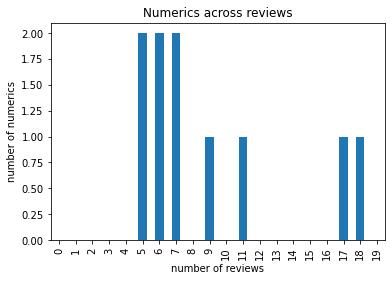

In [ ]:
# Bar plot for numerics across reviews 
df[0:20]['numerics'].plot.bar()
# Add labels 
plt.title('Numerics across reviews')
plt.xlabel('number of reviews')
plt.ylabel('number of numerics')

In [ ]:
# Number of upper case words from each review 
df['upper'] = df['JwMarriot_reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['JwMarriot_reviews','upper']]

JwMarriot_reviews  upper
0     The best stay with amazing facilities and serv...      0
1     We had booked the night stay to celebrate birt...      1
2     JW Marriott or Marriott is always the best cho...      1
3     Its expensive but they take good care of you. ...      0
4     For a short stay, JWM Juhu offered a great cit...      1
...                                                 ...    ...
2995  My wife & daughter had a 3 night stay, great l...      0
2996  I am currently staying at the Marriott and wil...     17
2997  We stayed for five nights and found this hotel...      1
2998  Experienced one of the finest venues to organi...      1
2999  My second business stay in this hotel. Newly r...      0

[3000 rows x 2 columns]

Text(0, 0.5, 'number of upper symbol range')

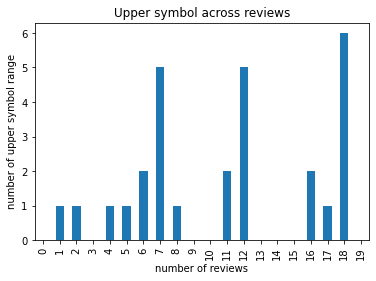

In [ ]:
# Bar plot for upper symbol symbol across reviews 
df[0:20]['upper'].plot.bar()
# Add labels 
plt.title('Upper symbol across reviews')
plt.xlabel('number of reviews')
plt.ylabel('number of upper symbol range')

In [ ]:
# get the dataframe columns
cols = df.columns 

#print the columns
print(cols)

Index(['JwMarriot_reviews', 'word_count', 'char_count', 'avg_word',
       'stopwords', 'hastags', 'numerics', 'upper'],
      dtype='object')


In [ ]:
# Text Cleaning or Text preprocessing
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import string         # special operations on strings
import spacy          # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
# Making Review lowercase, removing text in square brackets, removing punctuation and removing words containing numbers
import re #regular expression
import string

def clean_text(JwMarriot_reviews):
    '''Make Review lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    JwMarriot_reviews = JwMarriot_reviews.lower()
    JwMarriot_reviews = re.sub('\[.*?\]', '', JwMarriot_reviews)
    JwMarriot_reviews = re.sub('[%s]' % re.escape(string.punctuation), '', JwMarriot_reviews)
    JwMarriot_reviews = re.sub('\w*\d\w*', '', JwMarriot_reviews)
    JwMarriot_reviews = re.sub("[0-9" "]+"," ",JwMarriot_reviews)
    JwMarriot_reviews = re.sub('[‘’“”…]', '', JwMarriot_reviews)
    return JwMarriot_reviews

clean = lambda x: clean_text(x)

In [ ]:
# Printing reviews after removing punctuation,numerical words, square brackets  
df['JwMarriot_reviews']= df.JwMarriot_reviews.apply(clean)
df.JwMarriot_reviews

0       the best stay with amazing facilities and serv...
1       we had booked the night stay to celebrate birt...
2       jw marriott or marriott is always the best cho...
3       its expensive but they take good care of you r...
4       for a short stay jwm juhu offered a great city...
                              ...                        
2995    my wife  daughter had a  night stay great loca...
2996    i am currently staying at the marriott and wil...
2997    we stayed for five nights and found this hotel...
2998    experienced one of the finest venues to organi...
2999    my second business stay in this hotel newly re...
Name: JwMarriot_reviews, Length: 3000, dtype: object

In [ ]:
# Word frequency
freq_words = pd.Series(' '.join(df['JwMarriot_reviews']).split()).value_counts()[:30] # for top 30
freq_words

the        17162
and         9852
to          6738
a           6217
was         4875
is          4543
in          4316
i           4291
of          4251
hotel       3326
for         3224
at          2635
with        2269
very        2199
we          2132
this        2096
it          2051
my          1871
staff       1856
you         1797
are         1764
room        1645
on          1589
service     1504
from        1478
have        1459
stay        1432
had         1414
were        1378
good        1375
dtype: int64

In [ ]:
# Removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['JwMarriot_reviews'] = df['JwMarriot_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
## Lemmatization of stop words 
import spacy 
import en_core_web_sm
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")
# Increasing the text lenth in nlp 
nlp.max_length = 3000000
# lemmas being one of them, but mostly POS, which will follow later
clean_rev = nlp(' '.join(df['JwMarriot_reviews']))
print(clean_rev)

best stay amazing facilities service staff helpful friendly really good hands staff help problem family totally loves place hope visit pandemic booked night stay celebrate birthday little princess turned lifetime memorable upgraded us presidential suite comfort also made special arrangements make day special guests luxurious day suite spacious elegant mesmerising view buffet meals lotus cafe mouth watering huge variety dishes hospitality extended staff made us feel home would like convey special thanks msrashmi guest relations mr satish fb mr sohaib duty manager ms amen mrrohit tiwari manager making required arrangements looking forward visit jw marriott marriott always best choice birthday celebration upgraded room best one staff always courteous training breakfast good lunch dinner better marriott members since long time always continue choose brand stay cheers expensive take good care rooms cleaned everyday staff warm welcoming stay great everything seemed focussed customer satisfac

In [ ]:
# Tokenize after reviews lemmatization 
clean_revs = [token.lemma_ for token in clean_rev]
print(clean_revs)

['good', 'stay', 'amazing', 'facility', 'service', 'staff', 'helpful', 'friendly', 'really', 'good', 'hand', 'staff', 'help', 'problem', 'family', 'totally', 'love', 'place', 'hope', 'visit', 'pandemic', 'book', 'night', 'stay', 'celebrate', 'birthday', 'little', 'princess', 'turn', 'lifetime', 'memorable', 'upgrade', 'us', 'presidential', 'suite', 'comfort', 'also', 'make', 'special', 'arrangement', 'make', 'day', 'special', 'guest', 'luxurious', 'day', 'suite', 'spacious', 'elegant', 'mesmerise', 'view', 'buffet', 'meal', 'lotus', 'cafe', 'mouth', 'water', 'huge', 'variety', 'dish', 'hospitality', 'extend', 'staff', 'make', '-PRON-', 'feel', 'home', 'would', 'like', 'convey', 'special', 'thank', 'msrashmi', 'guest', 'relation', 'mr', 'satish', 'fb', 'mr', 'sohaib', 'duty', 'manager', 'ms', 'amen', 'mrrohit', 'tiwari', 'manager', 'make', 'require', 'arrangement', 'look', 'forward', 'visit', 'jw', 'marriott', 'marriott', 'always', 'good', 'choice', 'birthday', 'celebration', 'upgrade',

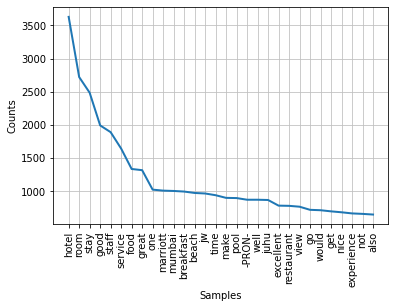

In [ ]:
# Most Frequent top 10 words 
Frequent_words = nltk.FreqDist(clean_revs) 
Frequent_words.plot(30)

In [ ]:
# Prining top frequent words 
Frequent_words_count=pd.Series(clean_revs).value_counts()[:30]  
Frequent_words_count

hotel         3628
room          2722
stay          2486
good          1994
staff         1892
service       1645
food          1338
great         1320
one           1027
marriott      1012
mumbai        1007
breakfast      998
beach          977
jw             969
time           943
make           903
pool           900
-PRON-         875
well           875
juhu           871
excellent      786
restaurant     783
view           770
go             723
would          717
get            700
nice           686
experience     669
not            662
also           652
dtype: int64

In [ ]:
# Download the vader lexicon from nltk library 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
pip install twython

In [ ]:
# Creating positive, negative, neutral sentiments polarity with compound scores across reviews 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['JwMarriot_reviews']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['JwMarriot_reviews']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['JwMarriot_reviews']]
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['JwMarriot_reviews']]
df

JwMarriot_reviews  ...  compound
0     best stay amazing facilities service staff hel...  ...    0.9760
1     booked night stay celebrate birthday little pr...  ...    0.9723
2     jw marriott marriott always best choice birthd...  ...    0.9726
3     expensive take good care rooms cleaned everyda...  ...    0.9509
4     short stay jwm juhu offered great city retreat...  ...    0.9359
...                                                 ...  ...       ...
2995  wife daughter night stay great location great ...  ...    0.9738
2996  currently staying marriott another nights – wi...  ...    0.8575
2997  stayed five nights found hotel lived expectati...  ...    0.9559
2998  experienced one finest venues organize mid siz...  ...    0.9818
2999  second business stay hotel newly refurbished f...  ...    0.9382

[3000 rows x 12 columns]

Text(0, 0.5, 'positive sentiment score range')

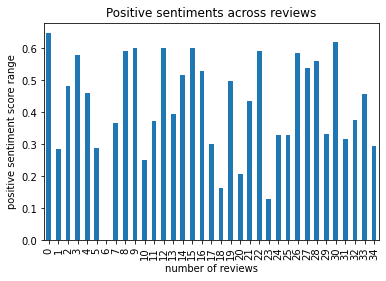

In [ ]:
# Bar Plot for positive sentiments across reviews 
df[0:35]['pos'].plot.bar()
# Add labels 
plt.title('Positive sentiments across reviews')
plt.xlabel('number of reviews')
plt.ylabel('positive sentiment score range')

Text(0, 0.5, 'negative sentiment score range')

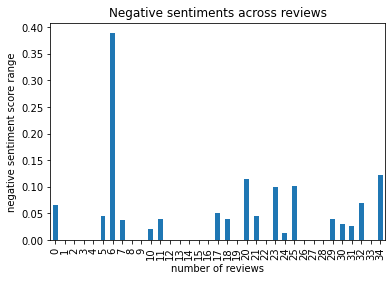

In [ ]:
# Bar Plot for negative sentiments across reviews 
df[0:35]['neg'].plot.bar()
# Add labels 
plt.title('Negative sentiments across reviews')
plt.xlabel('number of reviews')
plt.ylabel('negative sentiment score range')

Text(0, 0.5, 'neural sentiment score range')

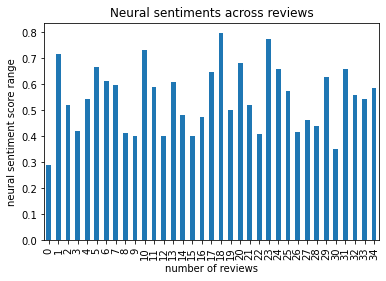

In [ ]:
# Bar Plot for neutral sentiments across reviews 
df[0:35]['neu'].plot.bar()
# Add labels 
plt.title('Neural sentiments across reviews')
plt.xlabel('number of reviews')
plt.ylabel('neural sentiment score range')

Text(0, 0.5, 'compound score range')

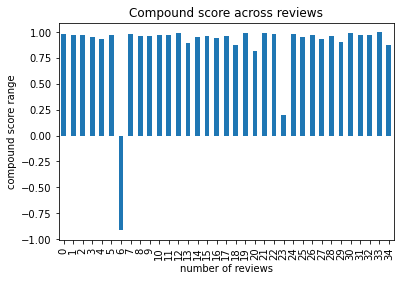

In [ ]:
# Bar Plot for compound scores across reviews 
df[0:35]['compound'].plot.bar()
# Add labels 
plt.title('Compound score across reviews')
plt.xlabel('number of reviews')
plt.ylabel('compound score range')

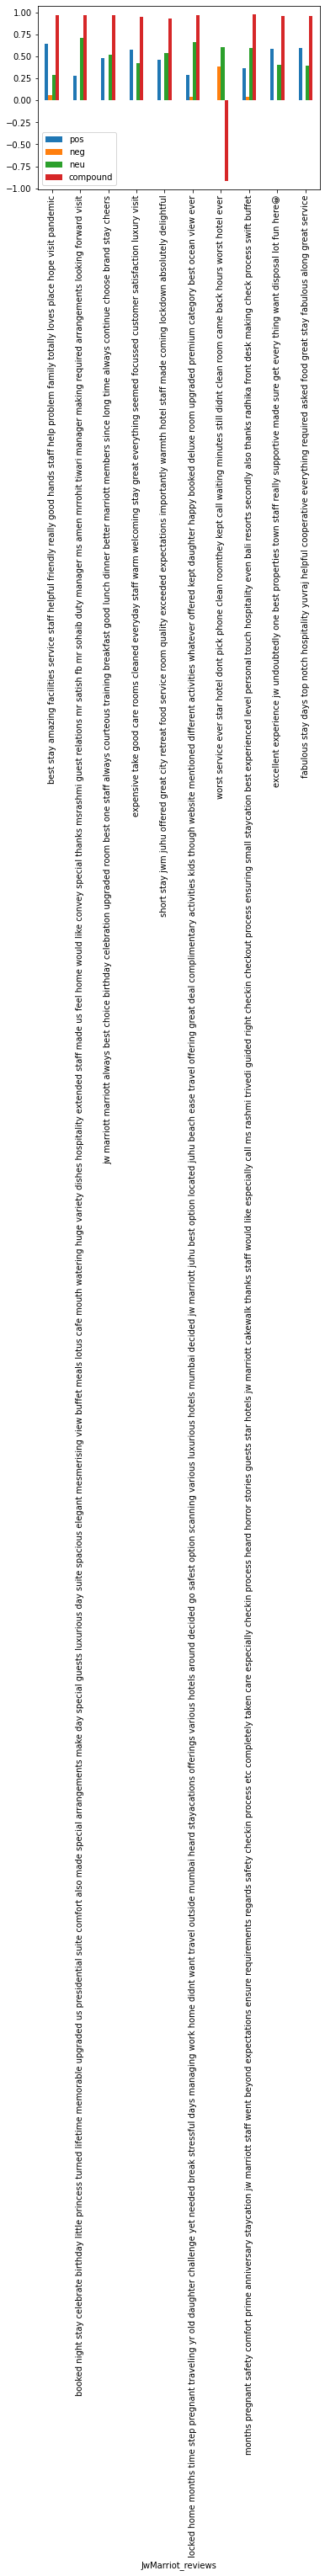

In [ ]:
# Positive, Negative & Neutral sentiments along with compound score across reviews   
df[0:10].plot(x="JwMarriot_reviews", y=["pos", "neg", "neu","compound"], kind="bar")

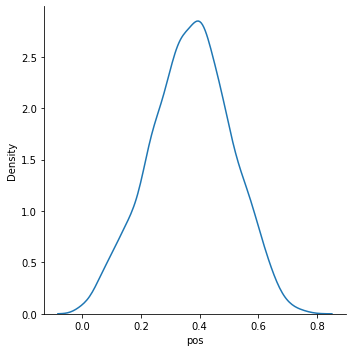

In [ ]:
# Plot positive sentiments density in reviews 
import seaborn as sns 
sns.displot(df, x="pos", kind="kde")

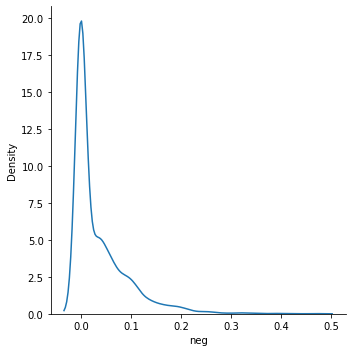

In [ ]:
# Plot negative sentiments density in reviews 
import seaborn as sns 
sns.displot(df, x="neg", kind="kde")

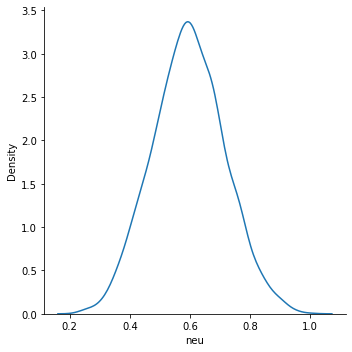

In [ ]:
# Plot negative sentiments density in reviews 
import seaborn as sns 
sns.displot(df, x="neu", kind="kde")

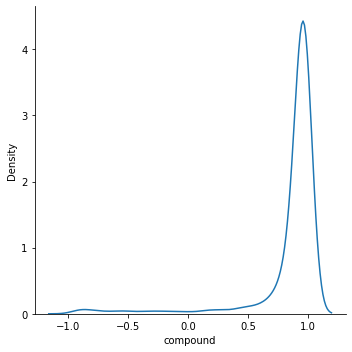

In [ ]:
# Plot negative sentiments density in reviews 
import seaborn as sns 
sns.displot(df, x="compound", kind="kde")

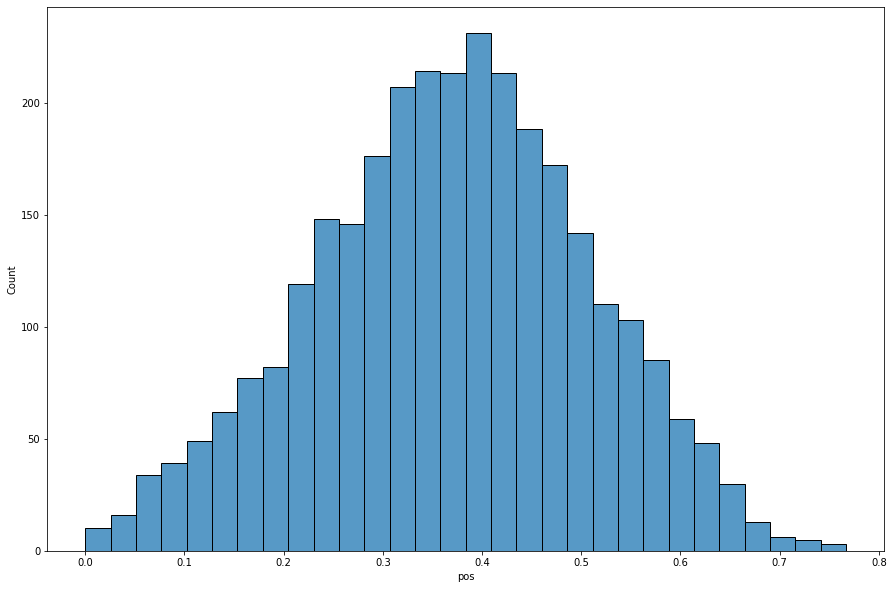

In [ ]:
# Plot positive sentiments frequency in reviews 
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.histplot(x='pos',data=df)

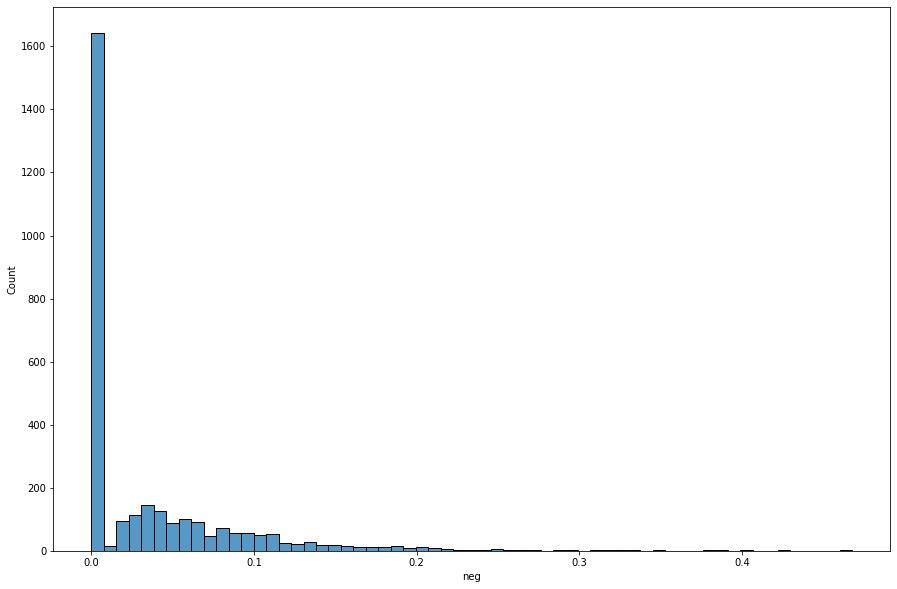

In [ ]:
# Plot negative sentiments frequency in reviews 
plt.figure(figsize=(15, 10))
sns.histplot(x='neg',data=df)

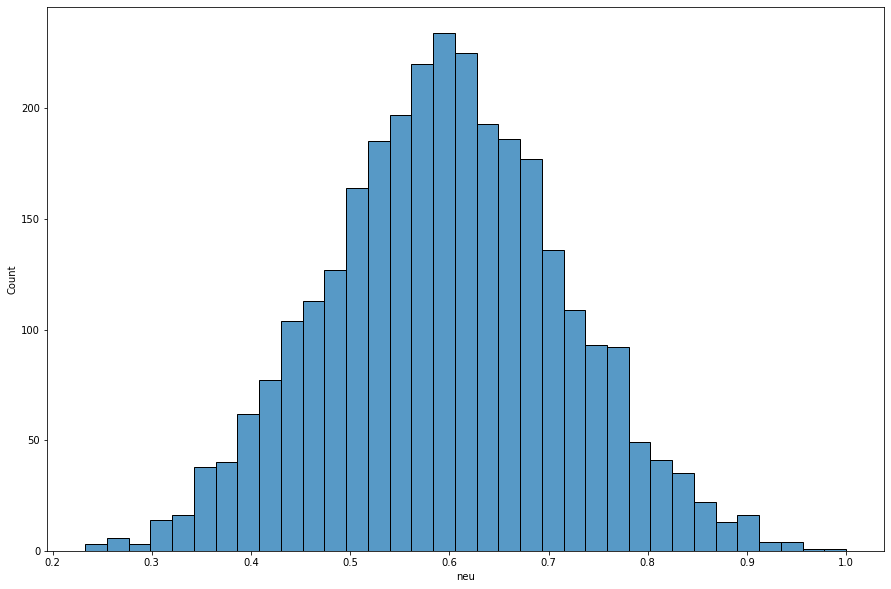

In [ ]:
# Plot neutral sentiments frequency in reviews 
plt.figure(figsize=(15, 10))
sns.histplot(x='neu',data=df)

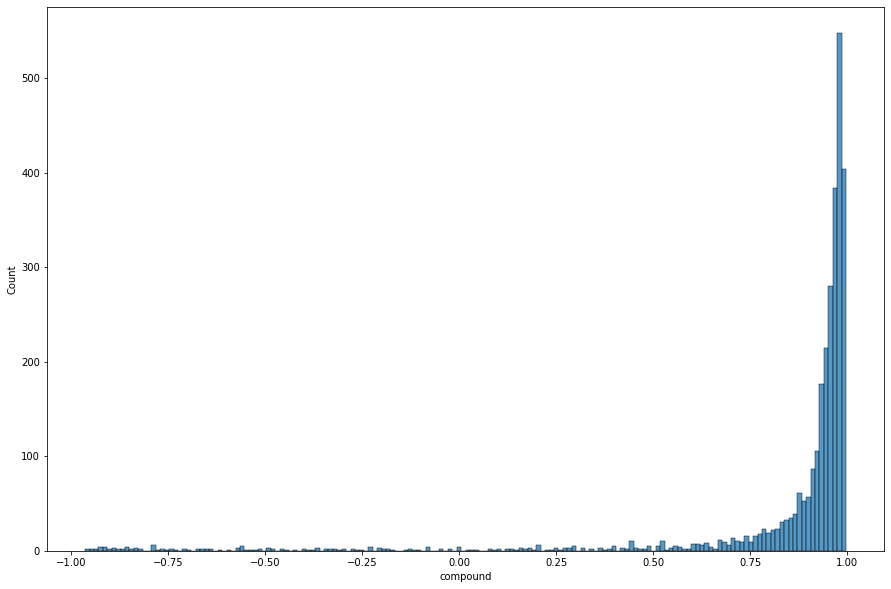

In [ ]:
# Plot compound sentiments frequency in reviews 
plt.figure(figsize=(15, 10))
sns.histplot(x='compound',data=df)

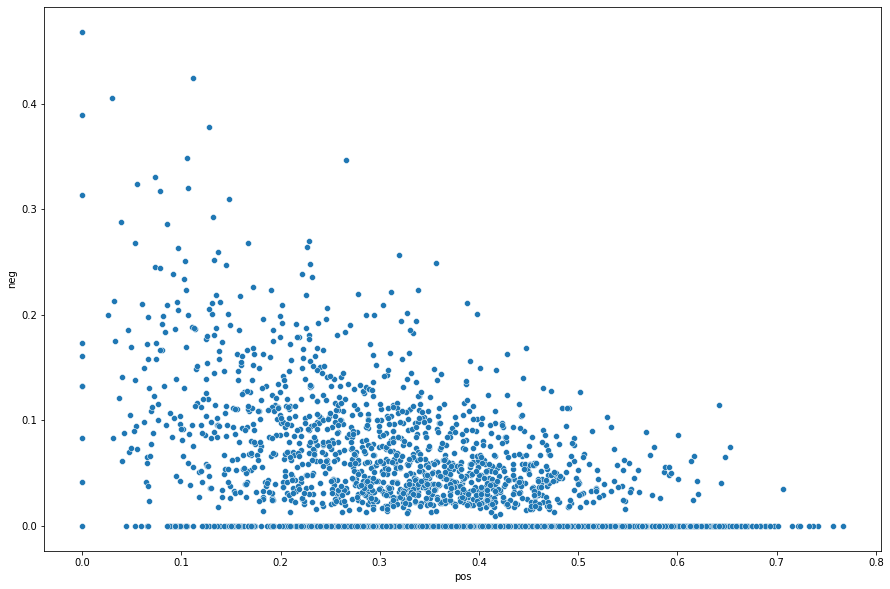

In [ ]:
## Scatter plot between positive & negative sentiments 
plt.figure(figsize=(15, 10))
sns.scatterplot(x='pos',y='neg',data=df)

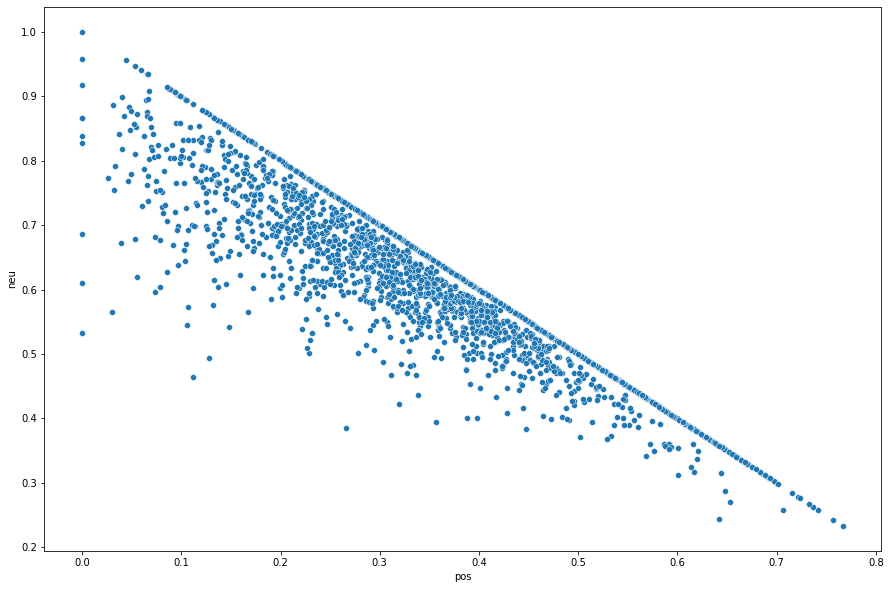

In [ ]:
## Scatter plot between positive & negative sentiments 
plt.figure(figsize=(15, 10))
sns.scatterplot(x='pos',y='neu',data=df)

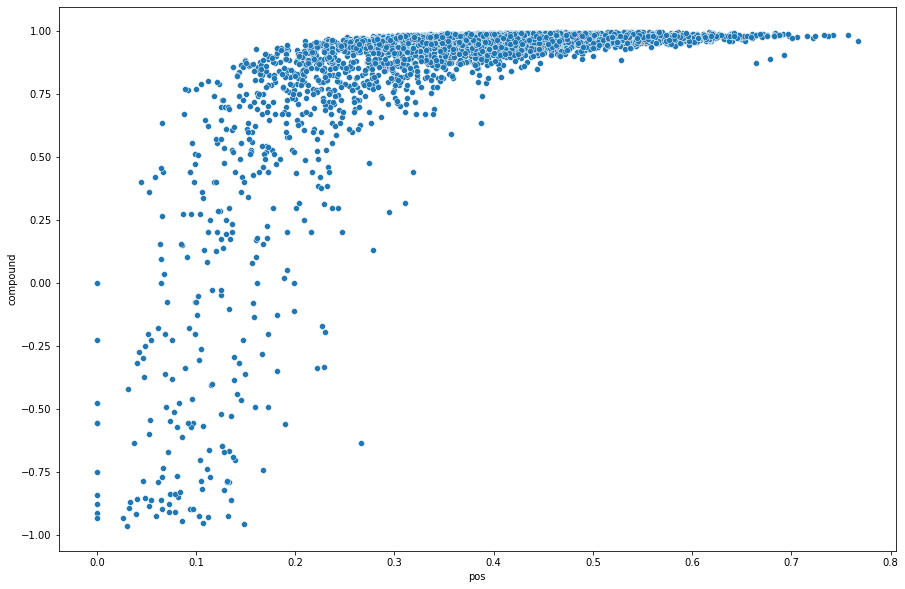

In [ ]:
## Scatter plot between positive sentiments across compound scores 
plt.figure(figsize=(15, 10))
sns.scatterplot(x='pos',y='compound',data=df)

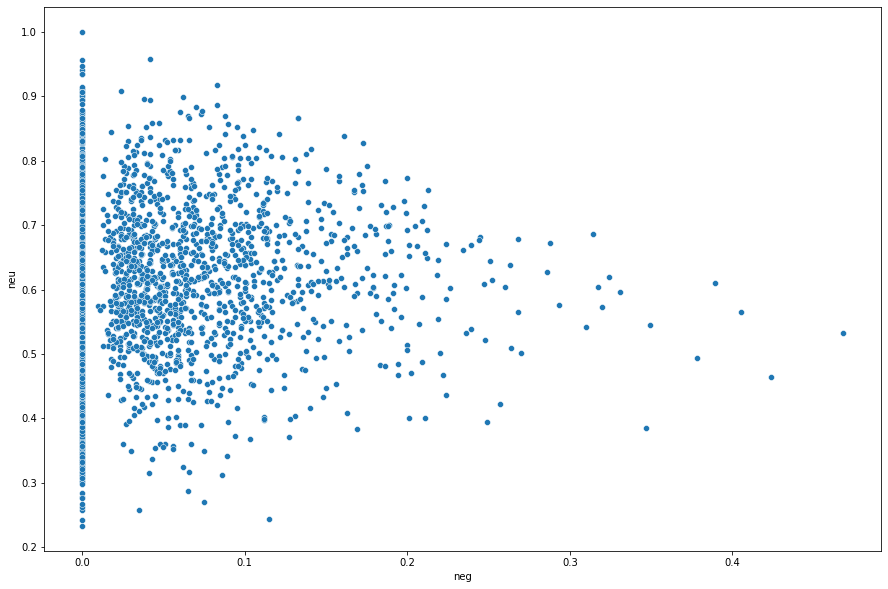

In [ ]:
## Scatter plot between positive & neutral sentiments 
plt.figure(figsize=(15, 10))
sns.scatterplot(x='neg',y='neu',data=df)

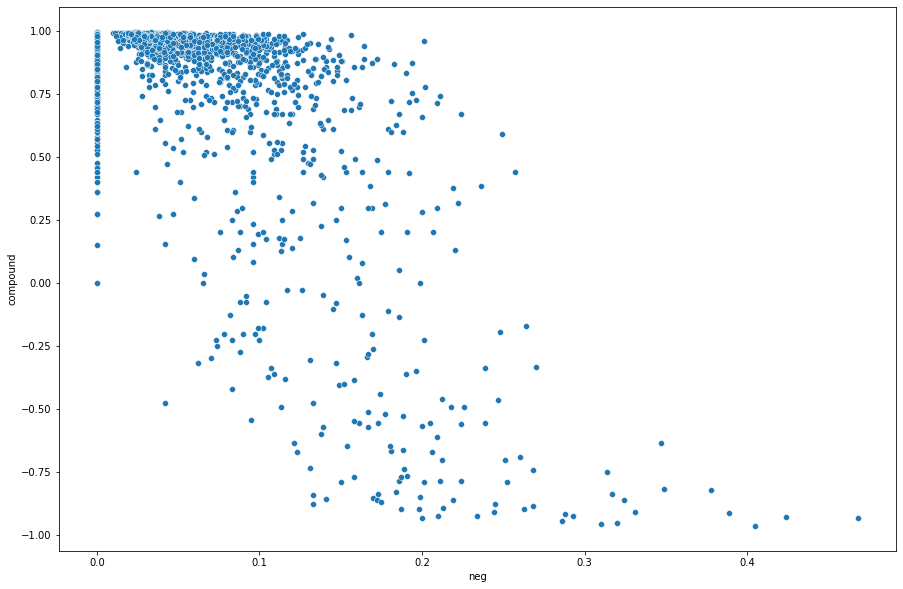

In [ ]:
## Scatter plot of  negative sentiments across compound scores 
plt.figure(figsize=(15, 10))
sns.scatterplot(x='neg',y='compound',data=df)

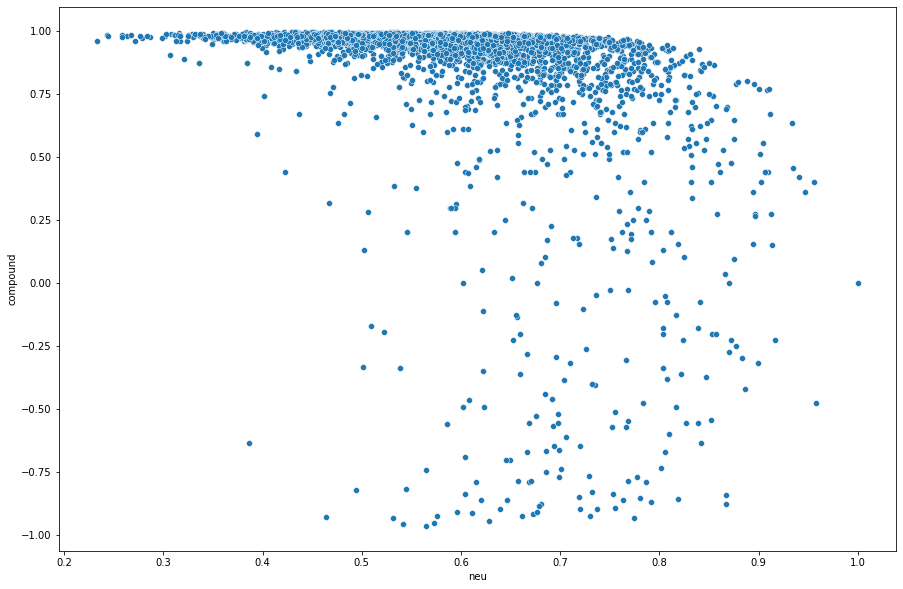

In [ ]:
## Scatter plot of  neural sentiments across compound scores 
plt.figure(figsize=(15, 10))
sns.scatterplot(x='neu',y='compound',data=df)

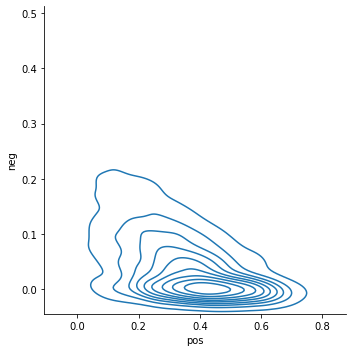

In [ ]:
## Density plot(Analogous to histogram) between positive & negative sentiments 
sns.displot(df,x='pos',y='neg', kind="kde")

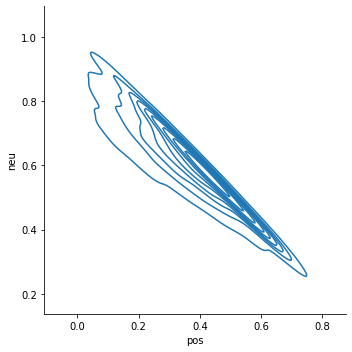

In [ ]:
## Density plot(Analogous to histogram) between positive & neural sentiments 
sns.displot(df,x='pos',y='neu', kind="kde")

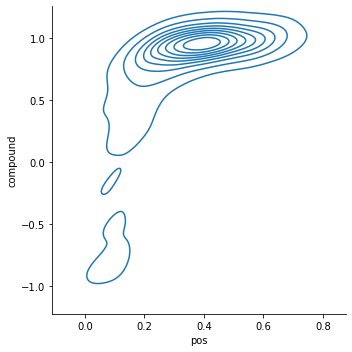

In [ ]:
## Density plot(Analogous to histogram) between positive sentiments & compound scores
sns.displot(df,x='pos',y='compound', kind="kde")

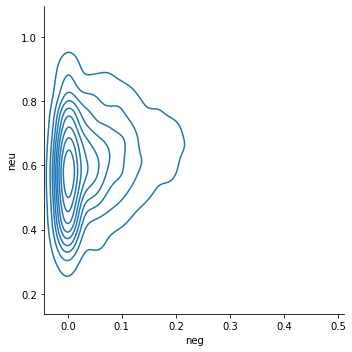

In [ ]:
## Density plot(Analogous to histogram) between negative & neural sentiments 
sns.displot(df,x='neg',y='neu', kind="kde")

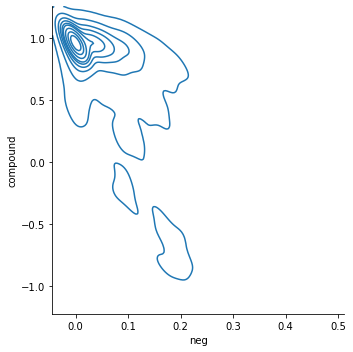

In [ ]:
## Density plot(Analogous to histogram) between negative sentiments & compound scores 
sns.displot(df,x='neg',y='compound', kind="kde")

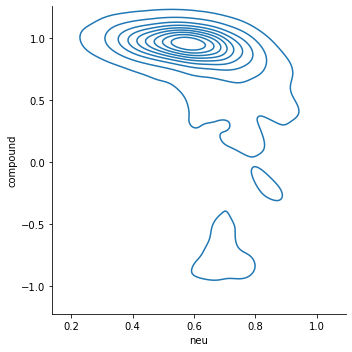

In [ ]:
## Density plot between neural sentiments & compound scores 
sns.displot(df,x='neu',y='compound', kind="kde")

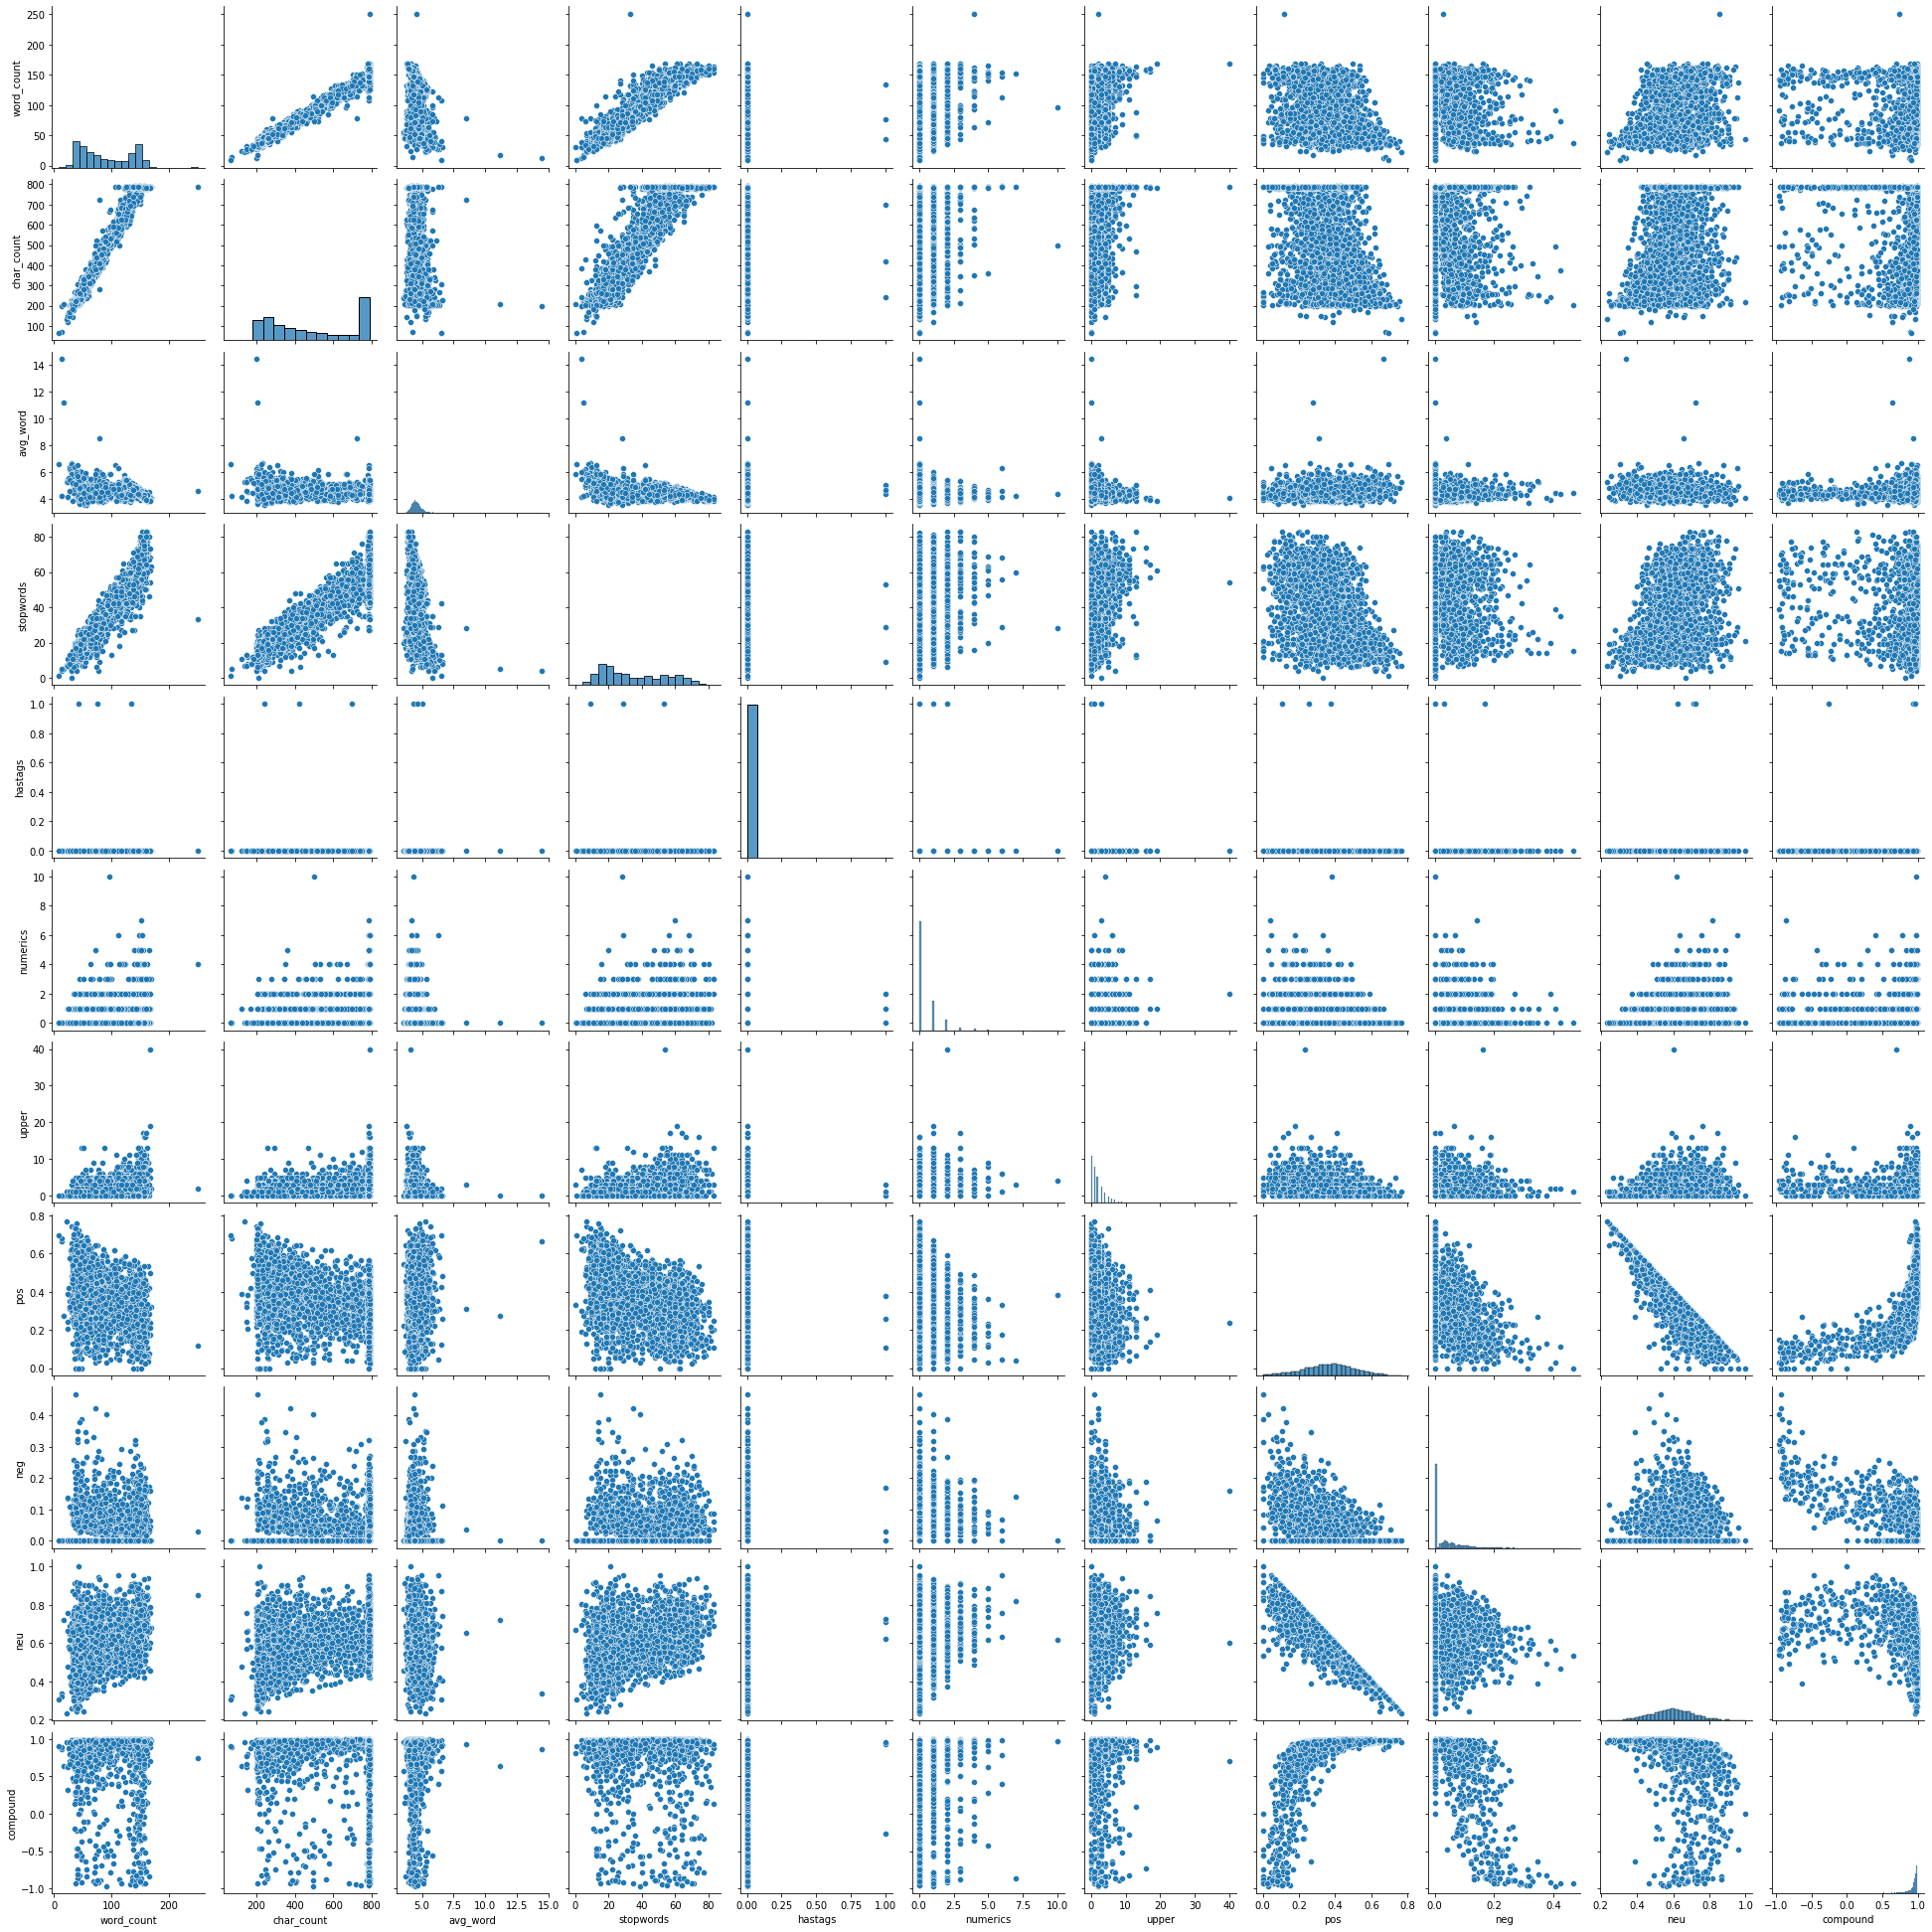

In [ ]:
# Pair plot 
sns.pairplot(df)

In [ ]:
# Generate wordcloud
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

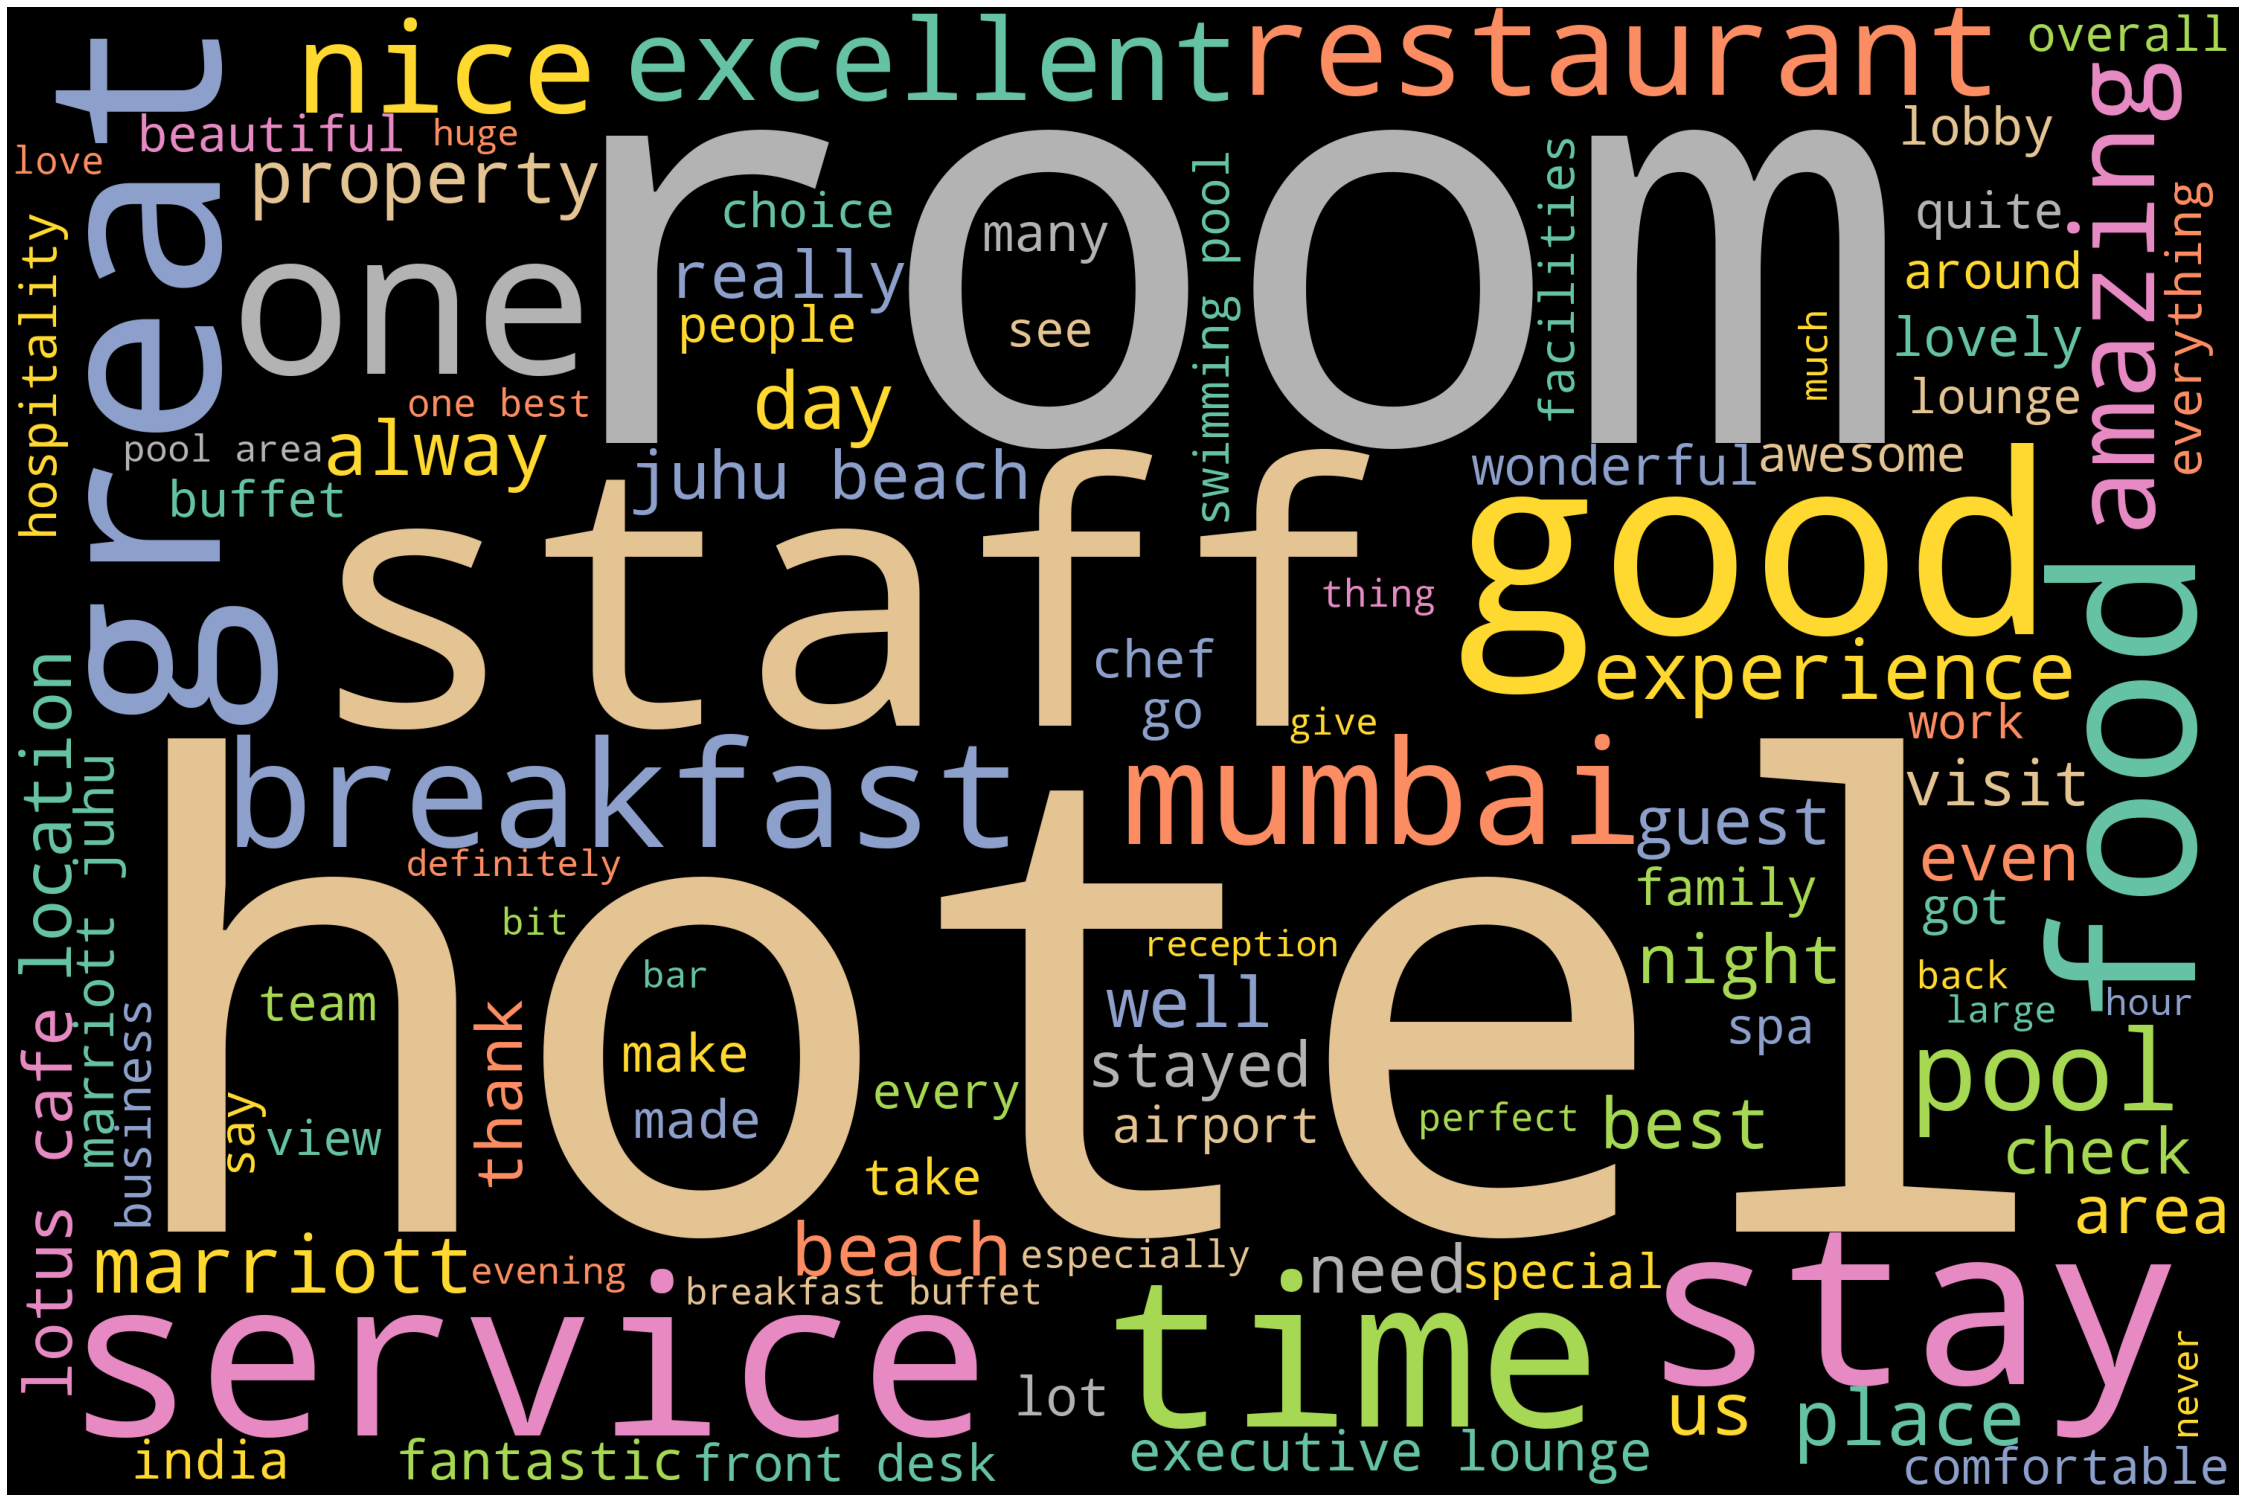

In [ ]:
# Generate wordcloud of frequent words  
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('JW')
fw_cloud = WordCloud(width = 3000, height = 2000, background_color='black', 
                     max_words=100,colormap='Set2',stopwords=stopwords).generate(''.join(df['JwMarriot_reviews']))
# Plot
plot_cloud(fw_cloud)

In [ ]:
# Storing frequent words worldcloud image
fw_cloud.to_file("fw_cloud.png")

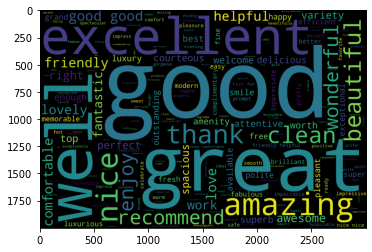

In [ ]:
# Positive sentiments wordcloud 
with open("positive-words.txt") as pw:
     positive_words = pw.read()
positive_words = positive_words.split("\n")
positive_words = positive_words[50:]
 
hotel_rev_posw = " ".join([w for w in clean_revs if w in positive_words])
wordcloud_pos = WordCloud(
                background_color = 'black',
                width = 3000,
                height = 2000
                ).generate(hotel_rev_posw)
plt.imshow(wordcloud_pos)

In [ ]:
# Storing positive worldcloud image
wordcloud_pos.to_file("hotel_pos_rev.png")

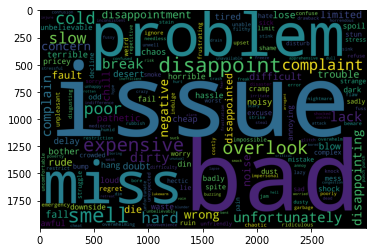

In [ ]:
# Negative sentiments wordcloud 
with open("negative-words.txt", encoding = "ISO-8859-1") as nw:
  negative_words = nw.read()
  
negative_words = negative_words.split("\n")
negative_words = negative_words[:]

hotel_rev_negw  = " ".join([w for w in clean_revs if w in negative_words])
wordcloud_neg = WordCloud(
                background_color = 'black',
                width = 3000,
                height = 2000
               ).generate(hotel_rev_negw ) 
plt.imshow(wordcloud_neg )

In [ ]:
# Storing negative worldcloud image
wordcloud_neg.to_file("hotel_neg_rev.png")

In [ ]:
# Count vectoriser tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(clean_revs)
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [ ]:
# Printing frequency % of words occurences 
word_freq_df.head(30)

term  occurrences  frequency
0             aa            1   0.000007
1      aaddresse            1   0.000007
2           aage            1   0.000007
3          aalok            1   0.000007
4         aamaze            1   0.000007
5          aamby            1   0.000007
6      aamenitie            1   0.000007
7          aamir            1   0.000007
8           aane            1   0.000007
9         aarora            1   0.000007
10         aback            1   0.000007
11         abate            1   0.000007
12         abdul            3   0.000022
13      abhijeet            2   0.000014
14       abhijit            1   0.000007
15      abhilash            1   0.000007
16     abhishaik            2   0.000014
17      abhishek           16   0.000116
18  abhishiekone            1   0.000007
19     abhorable            1   0.000007
20      abhsihek            1   0.000007
21       abhvani            1   0.000007
22       abience            2   0.000014
23       ability            6   0.000043
24       abishek            3   0.000022
25          abit            1   0.000007
26         abiut            1   0.000007
27          able           50   0.000362
28        abroad            3   0.000022
29       absence            2   0.000014

In [ ]:
## N-grams
#Extracting Uni-grams from reviews 
def get_top_n_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(1,1),  # for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
# Extracting top 200 features from Uni-grams 
top_words = get_top_n_words(df.JwMarriot_reviews, n=200) # top 200
top_df = pd.DataFrame(top_words)
top_df.columns=["Uni-gram", "Freq"]
top_df

Uni-gram  Freq
0           hotel  3326
1           staff  1857
2            room  1645
3         service  1504
4            stay  1433
..            ...   ...
195           etc   122
196           new   121
197          near   120
198  professional   120
199      customer   119

[200 rows x 2 columns]

[Text(0, 0, 'hotel'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'room'),
 Text(0, 0, 'service'),
 Text(0, 0, 'stay'),
 Text(0, 0, 'good'),
 Text(0, 0, 'great'),
 Text(0, 0, 'food'),
 Text(0, 0, 'rooms'),
 Text(0, 0, 'marriott'),
 Text(0, 0, 'mumbai'),
 Text(0, 0, 'one'),
 Text(0, 0, 'breakfast'),
 Text(0, 0, 'beach'),
 Text(0, 0, 'jw'),
 Text(0, 0, 'juhu'),
 Text(0, 0, 'pool'),
 Text(0, 0, 'stayed'),
 Text(0, 0, 'excellent'),
 Text(0, 0, 'well'),
 Text(0, 0, 'time'),
 Text(0, 0, 'best'),
 Text(0, 0, 'nice'),
 Text(0, 0, 'us'),
 Text(0, 0, 'also'),
 Text(0, 0, 'view'),
 Text(0, 0, 'would'),
 Text(0, 0, 'amazing'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'like')]

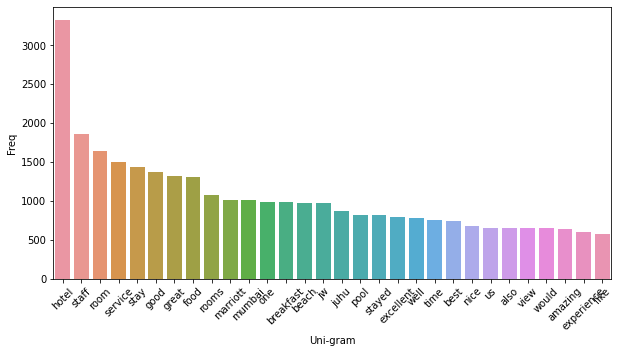

In [ ]:
#Uni-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top30_unigram = top_df.iloc[0:30,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top30_unigram["Uni-gram"],y=top30_unigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top30_unigram["Uni-gram"])

In [ ]:
#Extrcting Bi-grams from reviews 
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
# Extracting top 200 features from Bi-grams 
top2_words = get_top_n2_words(df.JwMarriot_reviews, n=200) # top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

Bi-gram  Freq
0         jw marriott   575
1          juhu beach   309
2          lotus cafe   297
3       marriott juhu   245
4    executive lounge   245
..                ...   ...
195         home away    27
196        staff also    27
197      variety food    27
198      near airport    27
199     overall great    27

[200 rows x 2 columns]

[Text(0, 0, 'jw marriott'),
 Text(0, 0, 'juhu beach'),
 Text(0, 0, 'lotus cafe'),
 Text(0, 0, 'marriott juhu'),
 Text(0, 0, 'executive lounge'),
 Text(0, 0, 'front desk'),
 Text(0, 0, 'one best'),
 Text(0, 0, 'swimming pool'),
 Text(0, 0, 'pool area'),
 Text(0, 0, 'breakfast buffet'),
 Text(0, 0, 'hotel staff'),
 Text(0, 0, 'room service'),
 Text(0, 0, 'sea view'),
 Text(0, 0, 'stayed jw'),
 Text(0, 0, 'stay hotel'),
 Text(0, 0, 'stay jw'),
 Text(0, 0, 'stayed hotel'),
 Text(0, 0, 'would like'),
 Text(0, 0, 'excellent service'),
 Text(0, 0, 'marriott mumbai'),
 Text(0, 0, 'ocean view'),
 Text(0, 0, 'customer service'),
 Text(0, 0, 'staff friendly'),
 Text(0, 0, 'coffee shop'),
 Text(0, 0, 'jw marriot'),
 Text(0, 0, 'great service'),
 Text(0, 0, 'food good'),
 Text(0, 0, 'well maintained'),
 Text(0, 0, 'star hotel'),
 Text(0, 0, 'view room')]

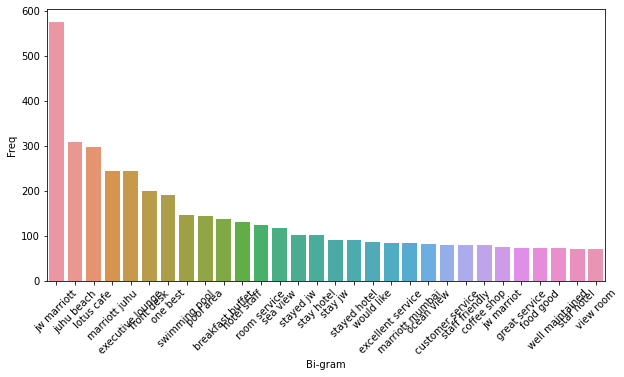

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top30_bigram = top2_df.iloc[0:30,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top30_bigram["Bi-gram"],y=top30_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top30_bigram["Bi-gram"])

In [ ]:
# Extracting Tri-grams from reviews 
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
# Extracting features from Tri-grams 
top3_words = get_top_n3_words(df.JwMarriot_reviews, n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

Tri-gram  Freq
0              jw marriott juhu   202
1            jw marriott mumbai    65
2            stayed jw marriott    63
3              stay jw marriott    59
4               one best hotels    44
..                          ...   ...
195  excellent customer service     6
196      customer service staff     6
197            hotel juhu beach     6
198              nice pool area     6
199           always smile face     6

[200 rows x 2 columns]

[Text(0, 0, 'jw marriott juhu'),
 Text(0, 0, 'jw marriott mumbai'),
 Text(0, 0, 'stayed jw marriott'),
 Text(0, 0, 'stay jw marriott'),
 Text(0, 0, 'one best hotels'),
 Text(0, 0, 'jw marriott hotel'),
 Text(0, 0, 'marriott mumbai juhu'),
 Text(0, 0, 'access executive lounge'),
 Text(0, 0, 'home away home'),
 Text(0, 0, 'sea facing room'),
 Text(0, 0, 'bombay baking company'),
 Text(0, 0, 'would highly recommend'),
 Text(0, 0, 'front desk staff'),
 Text(0, 0, 'staff friendly helpful'),
 Text(0, 0, 'breakfast lotus cafe'),
 Text(0, 0, 'right juhu beach'),
 Text(0, 0, 'ocean view room'),
 Text(0, 0, 'located juhu beach'),
 Text(0, 0, 'front desk manager'),
 Text(0, 0, 'would like thank'),
 Text(0, 0, 'sea view room'),
 Text(0, 0, 'food lotus cafe'),
 Text(0, 0, 'stayed one night'),
 Text(0, 0, 'marriott juhu mumbai'),
 Text(0, 0, 'well taken care'),
 Text(0, 0, 'staying jw marriott'),
 Text(0, 0, 'jw marriot juhu'),
 Text(0, 0, 'made us feel'),
 Text(0, 0, 'front office staff'),
 Text(0,

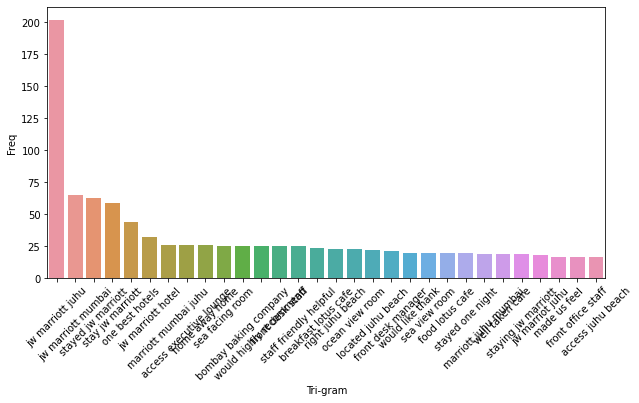

In [ ]:
#Tri-gram features plot 
import seaborn as sns
top30_trigram = top3_df.iloc[0:30,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top30_trigram["Tri-gram"],y=top30_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top30_trigram["Tri-gram"])

In [ ]:
#TFIDF - Term frequency inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(clean_revs)
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df1 = pd.DataFrame(denselist, columns = names_features)

In [ ]:
# Printing the extracting features details by Term frequency inverse Document Frequency
df1

abhishek  able  absolute  absolutely  ...  year  yes  young  yummy
0            0.0   0.0       0.0         0.0  ...   0.0  0.0    0.0    0.0
1            0.0   0.0       0.0         0.0  ...   0.0  0.0    0.0    0.0
2            0.0   0.0       0.0         0.0  ...   0.0  0.0    0.0    0.0
3            0.0   0.0       0.0         0.0  ...   0.0  0.0    0.0    0.0
4            0.0   0.0       0.0         0.0  ...   0.0  0.0    0.0    0.0
...          ...   ...       ...         ...  ...   ...  ...    ...    ...
138809       0.0   0.0       0.0         0.0  ...   0.0  0.0    0.0    0.0
138810       0.0   0.0       0.0         0.0  ...   0.0  0.0    0.0    0.0
138811       0.0   0.0       0.0         0.0  ...   0.0  0.0    0.0    0.0
138812       0.0   0.0       0.0         0.0  ...   0.0  0.0    0.0    0.0
138813       0.0   0.0       0.0         0.0  ...   0.0  0.0    0.0    0.0

[138814 rows x 1000 columns]

In [ ]:
## Define the condition for creating postive, negative & neutral polarity 
def sentiment_result(polarity):
    if polarity >= 0.1:
        return "Positive"
    elif polarity <= -0.1:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
# Create the Sentiments class generation using compound values with lambda function 
df["Sentiments"] = df["compound"].apply(lambda x: sentiment_result(x))

In [ ]:
# CVheking the review dataframe details 
df

JwMarriot_reviews  ...  Sentiments
0     best stay amazing facilities service staff hel...  ...    Positive
1     booked night stay celebrate birthday little pr...  ...    Positive
2     jw marriott marriott always best choice birthd...  ...    Positive
3     expensive take good care rooms cleaned everyda...  ...    Positive
4     short stay jwm juhu offered great city retreat...  ...    Positive
...                                                 ...  ...         ...
2995  wife daughter night stay great location great ...  ...    Positive
2996  currently staying marriott another nights – wi...  ...    Positive
2997  stayed five nights found hotel lived expectati...  ...    Positive
2998  experienced one finest venues organize mid siz...  ...    Positive
2999  second business stay hotel newly refurbished f...  ...    Positive

[3000 rows x 13 columns]

In [ ]:
# Removing the unwanted columns 
df.drop(['word_count','char_count','avg_word','stopwords','numerics','upper','hastags','pos','neu','neg','compound'],  axis = 1, inplace = True)

In [ ]:
# After removal cheking the review dataframe details 
df

JwMarriot_reviews Sentiments
0     best stay amazing facilities service staff hel...   Positive
1     booked night stay celebrate birthday little pr...   Positive
2     jw marriott marriott always best choice birthd...   Positive
3     expensive take good care rooms cleaned everyda...   Positive
4     short stay jwm juhu offered great city retreat...   Positive
...                                                 ...        ...
2995  wife daughter night stay great location great ...   Positive
2996  currently staying marriott another nights – wi...   Positive
2997  stayed five nights found hotel lived expectati...   Positive
2998  experienced one finest venues organize mid siz...   Positive
2999  second business stay hotel newly refurbished f...   Positive

[3000 rows x 2 columns]

In [ ]:
# Counting the Sentiments values 
df["Sentiments"].value_counts()

Positive    2863
Negative     119
Neutral       18
Name: Sentiments, dtype: int64

In [ ]:
# Assign values to Sentiments classes
clean_num = {"Sentiments": {"Positive": 1, "Negative": 2, "Neutral": 0 }}

In [ ]:
# Apply replace function to get assigned values in Sentiments classes 
df = df.replace(clean_num)
df

JwMarriot_reviews  Sentiments
0     best stay amazing facilities service staff hel...           1
1     booked night stay celebrate birthday little pr...           1
2     jw marriott marriott always best choice birthd...           1
3     expensive take good care rooms cleaned everyda...           1
4     short stay jwm juhu offered great city retreat...           1
...                                                 ...         ...
2995  wife daughter night stay great location great ...           1
2996  currently staying marriott another nights – wi...           1
2997  stayed five nights found hotel lived expectati...           1
2998  experienced one finest venues organize mid siz...           1
2999  second business stay hotel newly refurbished f...           1

[3000 rows x 2 columns]

In [ ]:
# Counting the Sentiments classes values 
df["Sentiments"].value_counts()

1    2863
2     119
0      18
Name: Sentiments, dtype: int64

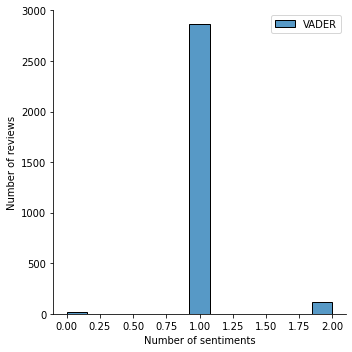

In [ ]:
# Sentiments across reviews 
import seaborn as sns 
sns.displot(df["Sentiments"], kde = False,  label = "VADER")
plt.xlabel("Number of sentiments")
plt.ylabel("Number of reviews")
plt.legend()
plt.show()

In [ ]:
# Top 5 reviews with its sentiments 
df.head()

JwMarriot_reviews  Sentiments
0  best stay amazing facilities service staff hel...           1
1  booked night stay celebrate birthday little pr...           1
2  jw marriott marriott always best choice birthd...           1
3  expensive take good care rooms cleaned everyda...           1
4  short stay jwm juhu offered great city retreat...           1

In [ ]:
# Creating csv of extracted reviews 
df.to_csv(r'Model_data.csv', index=True)